# Import the Dataset

In [107]:
import numpy as np
import pandas as pd

In [108]:
#Load the dataset
mydata = pd.read_csv('insurance.csv')

# a. Shape of the data

In [109]:
mydata.shape

(1338, 7)

In [110]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [111]:
print("Number of null values per column \n",mydata.isnull().sum())

Number of null values per column 
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [112]:
mydata.head().T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33,22.705,28.88
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.9,1725.55,4449.46,21984.5,3866.86


In [113]:
mydata.tail().T

,1333,1334,1335,1336,1337
age,50,18,18,21,61
sex,male,female,female,female,female
bmi,30.97,31.92,36.85,25.8,29.07
children,3,0,0,0,0
smoker,no,no,no,no,yes
region,northwest,northeast,southeast,southwest,northwest
charges,10600.5,2205.98,1629.83,2007.94,29141.4


In [114]:
mydata.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


# b. Data type of each attribute

In [115]:
mydata.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [116]:
#datatype of the column
mydata.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# c. Checking the presence of missing values

In [117]:
#Null values per column and total null values
print('Missing values by column:\n',mydata.isnull().sum())
print('-----------------------------')
print('Total Missing values: ',mydata.isnull().sum().sum())

Missing values by column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
-----------------------------
Total Missing values:  0


In [118]:
numeric_columns     = mydata.select_dtypes(include=np.number).columns
categorical_columns = mydata.select_dtypes(exclude=np.number).columns

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
Index(['age', 'bmi', 'children', 'charges'], dtype='object')

Categorical columns
Index(['sex', 'smoker', 'region'], dtype='object')


# d. 5 point summary of numerical attributes

In [119]:
print('5point summary for AGE ')

print('Min: %.3f' % mydata['age'].min())
print('Q1: %.3f' % mydata['age'].quantile(.25))
#print('Median: %.3f' %  mydata['age'].quantile(.5))
print('Median: %.3f' %  mydata['age'].median())
print('Q3: %.3f' %  mydata['age'].quantile(.75))
print('Max: %.3f' % mydata['age'].max())

5point summary for AGE 
Min: 18.000
Q1: 27.000
Median: 39.000
Q3: 51.000
Max: 64.000


In [120]:
print('5point summary for BMI ')

print('Min: %.3f' % mydata['bmi'].min())
print('Q1: %.3f' % mydata['bmi'].quantile(.25))
print('Median: %.3f' %  mydata['bmi'].quantile(.5))
#print('Median: %.3f' %  mydata['bmi'].median())
print('Q3: %.3f' %  mydata['bmi'].quantile(.75))
print('Max: %.3f' % mydata['bmi'].max())

5point summary for BMI 
Min: 15.960
Q1: 26.296
Median: 30.400
Q3: 34.694
Max: 53.130


In [121]:
print('5point summary for CHILDREN ')

print('Min: %.3f' % mydata['children'].min())
print('Q1: %.3f' % mydata['children'].quantile(.25))
print('Median: %.3f' %  mydata['children'].quantile(.5))
print('Q3: %.3f' %  mydata['children'].quantile(.75))
print('Max: %.3f' % mydata['children'].max())

5point summary for CHILDREN 
Min: 0.000
Q1: 0.000
Median: 1.000
Q3: 2.000
Max: 5.000


In [122]:
print('5point summary for CHARGES ')

print('Min: %.3f' % mydata['charges'].min())
print('Q1: %.3f' % mydata['charges'].quantile(.25))
print('Median: %.3f' %  mydata['charges'].quantile(.5))
print('Q3: %.3f' %  mydata['charges'].quantile(.75))
print('Max: %.3f' % mydata['charges'].max())

5point summary for CHARGES 
Min: 1121.874
Q1: 4740.287
Median: 9382.033
Q3: 16639.913
Max: 63770.428


# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

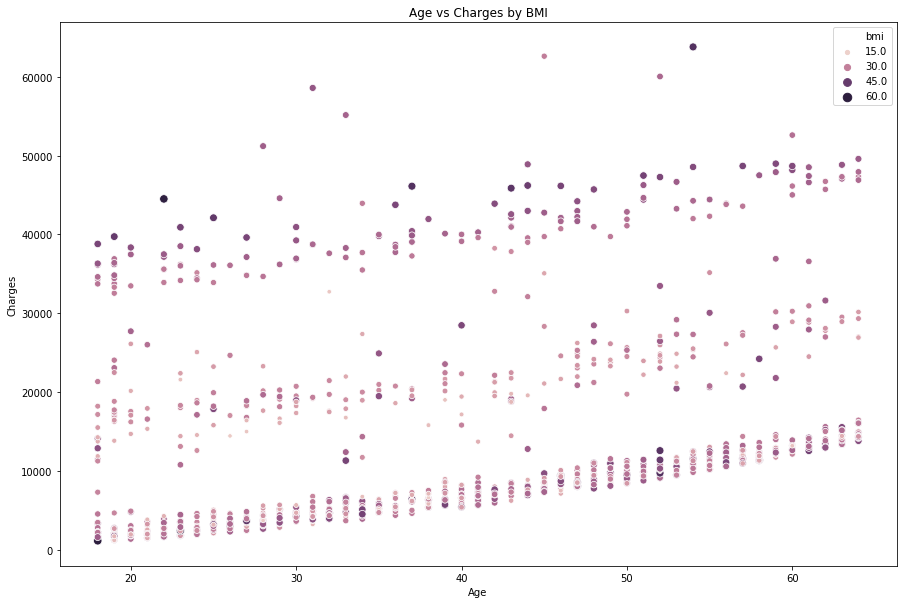

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='age',y='charges',hue = 'bmi',size = 'bmi', data=mydata)
ax = ax.set_title("Age vs Charges by BMI")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show(ax)

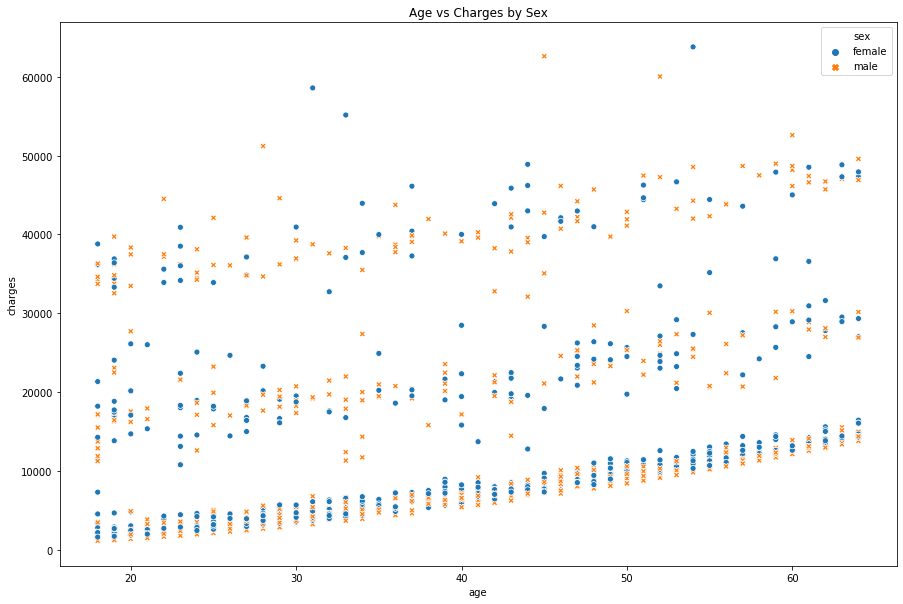

In [124]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='age',y='charges', hue='sex',style = 'sex',data=mydata)
ax.set_title("Age vs Charges by Sex")
plt.show(ax)

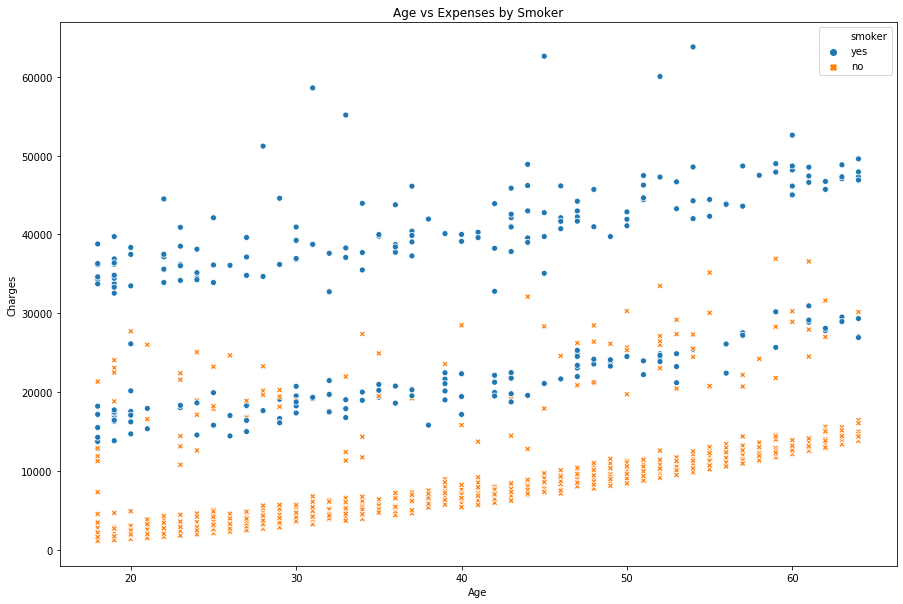

In [125]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='age',y='charges', hue='smoker',style ='smoker',data=mydata)
ax.set_title("Age vs Expenses by Smoker")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show(ax)

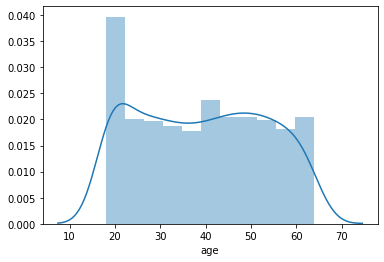

In [126]:
%matplotlib inline
import seaborn as sns
sns.distplot(mydata['age']);

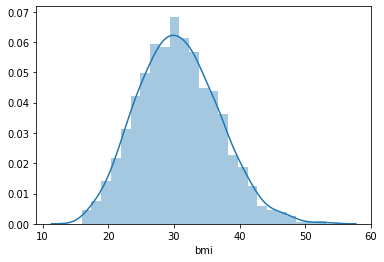

In [127]:
sns.distplot(mydata['bmi']);

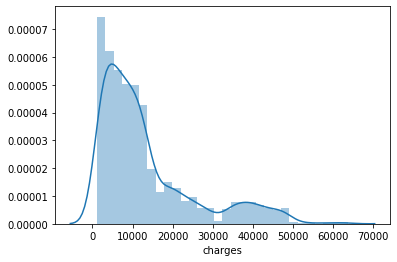

In [128]:
sns.distplot(mydata['charges']);

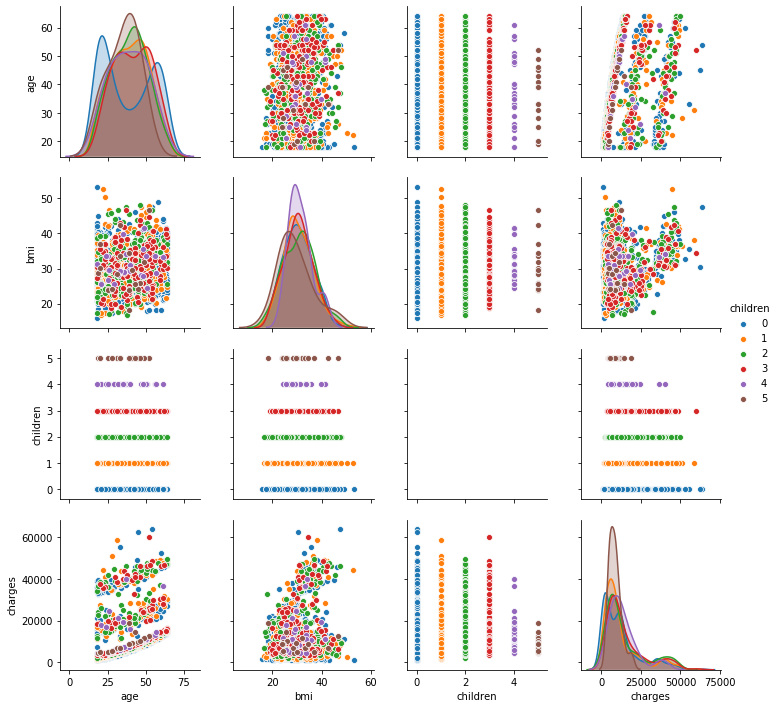

In [130]:
%matplotlib inline
import seaborn as sns
sns.pairplot(mydata, hue='children')

# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’

The rule of thumb seems to be: 
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. 
If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed. 
If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

In [131]:
from scipy.stats import skew
print("charges skew:  {}".format(skew(mydata['charges'])))

charges skew:  1.5141797118745743


In [132]:
print("age skew:  {}".format(skew(mydata['age'])))

age skew:  0.055610083072599126


In [133]:
print("bmi skew:  {}".format(skew(mydata['bmi'])))

bmi skew:  0.28372857291709386


# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns


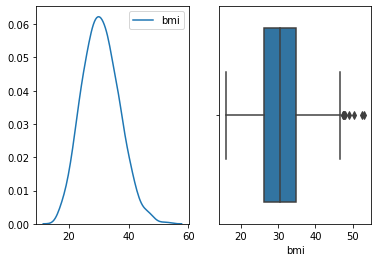

In [134]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(mydata['bmi'], ax=axes[0])
sns.boxplot(mydata['bmi'], ax=axes[1])
plt.show()

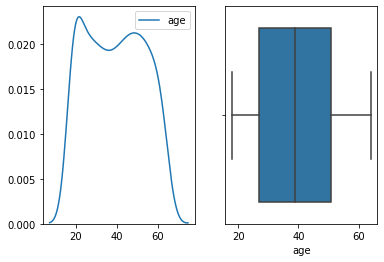

In [135]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(mydata['age'], ax=axes[0])
sns.boxplot(mydata['age'], ax=axes[1])
plt.show()

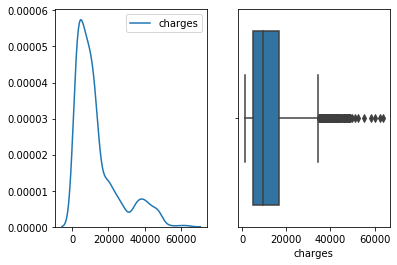

In [136]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(mydata['charges'], ax=axes[0])
sns.boxplot(mydata['charges'], ax=axes[1])
plt.show()

# h. Distribution of categorical columns (include children)


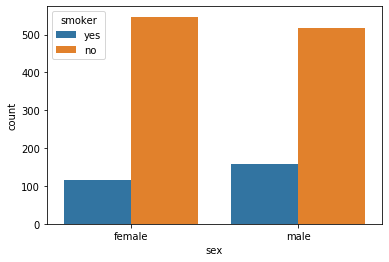

In [137]:
sns.countplot(x="sex", hue="smoker", data=mydata)

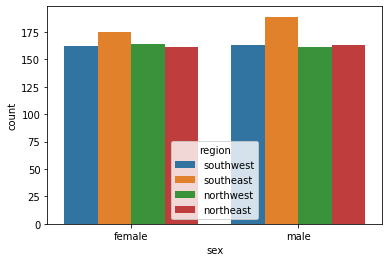

In [138]:
sns.countplot(x="sex", hue="region", data=mydata)

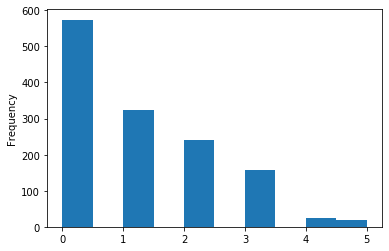

In [139]:
mydata['children'].plot(kind="hist")

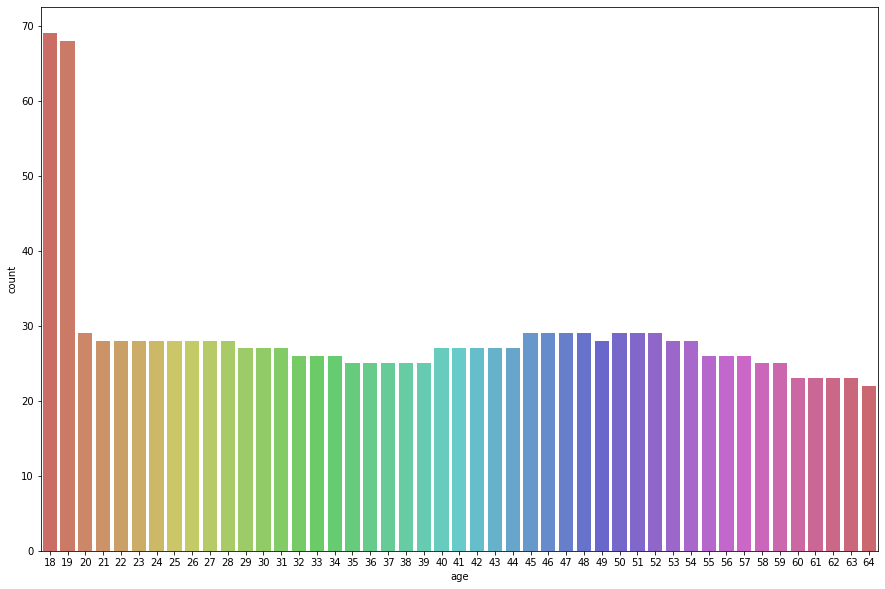

In [140]:
plt.figure(figsize = (15,10))
sns.countplot(x="age",data=mydata,palette='hls')

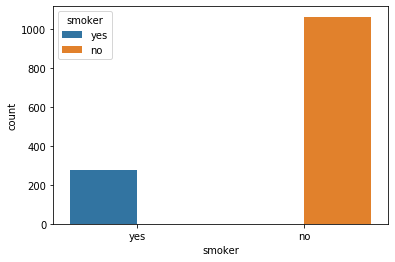

In [141]:
sns.countplot(x="smoker", hue="smoker", data=mydata)

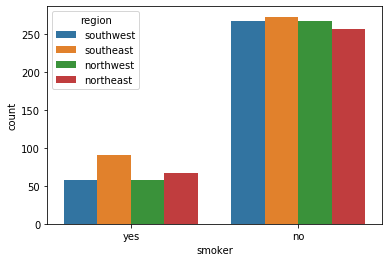

In [142]:
sns.countplot(x="smoker", hue="region", data=mydata)

# i. Pair plot that includes all the columns of the dataframe


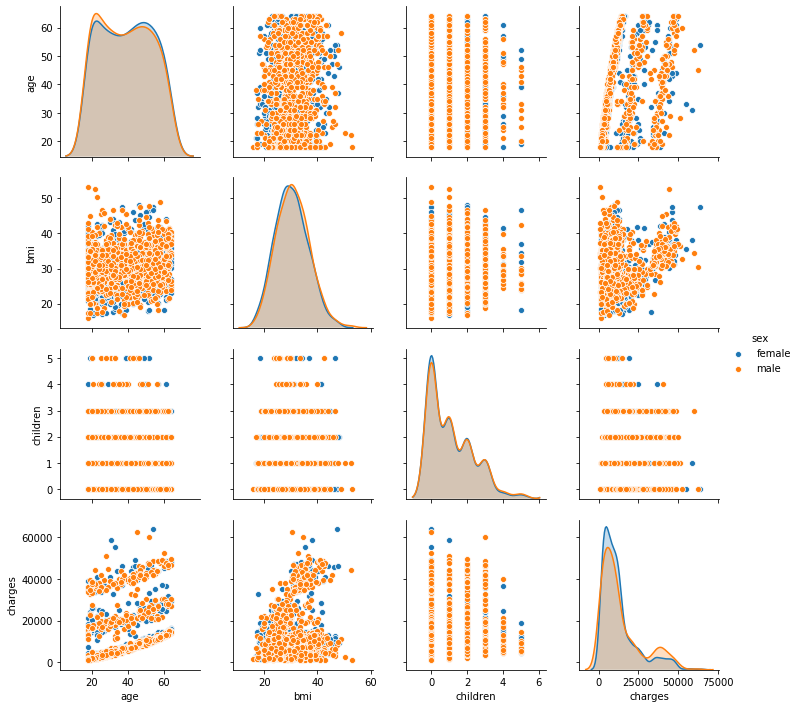

In [143]:
sns.pairplot(mydata, hue='sex')

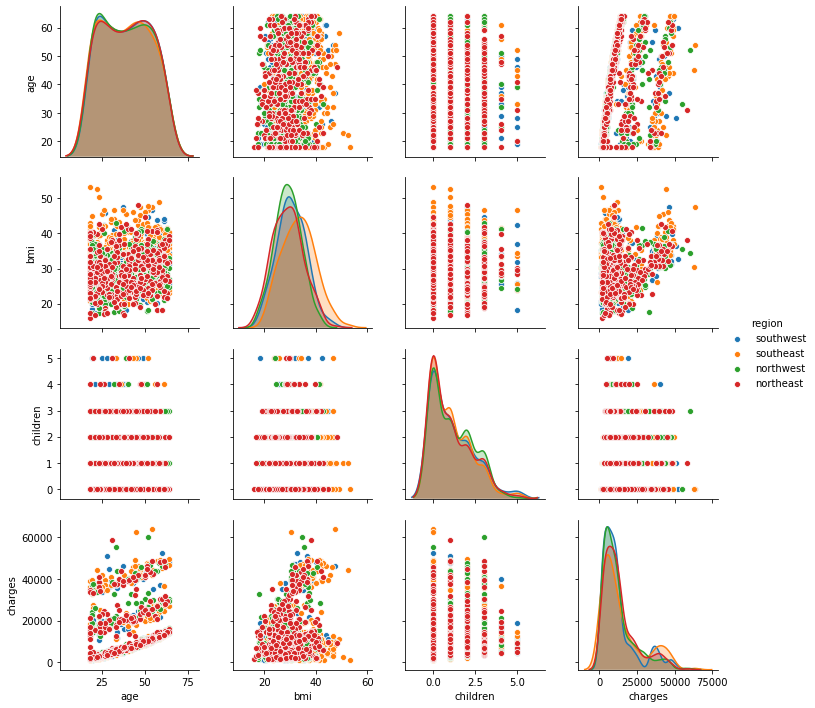

In [144]:
sns.pairplot(mydata, hue='region')

# 4. Answer the following questions with statistical evidence

# a. Do charges of people who smoke differ significantly from the people who don't?

Solution :: 2-Sample T test. 
********Null Hypothesis Ho = There is no relation between smokers and charges*******
********Alternate Hypothesis Ha = There is a relation between smokers and charges********        

In [145]:
smoker_df = mydata[mydata['smoker']=='yes']
nonsmoker_df = mydata[mydata['smoker']=='no']

In [146]:
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [147]:
nonsmoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [148]:
smoker_df.shape

(274, 7)

In [149]:
nonsmoker_df.shape

(1064, 7)

In [150]:
from scipy.stats import ttest_ind
from statsmodels.stats.power import ttest_power
t_statistic, p_value = ttest_ind(nonsmoker_df['charges'], smoker_df['charges'])
print ("two-sample t-test p-value=", p_value)
print ("two-sample t-test t_statistic=", t_statistic)
if(p_value >= 0.5):
    print('p_value is greater than/equal to 0.5. Hence failed to reject Null Hypothesis.  There is no significant difference in charges between smoker and non smoker')
else:
    print('p_value is less than 0.5. Hence reject Null Hypothesis. There is significant difference in charges between smoker and non smoker')

two-sample t-test p-value= 8.271435842177219e-283
two-sample t-test t_statistic= -46.664921172723716
p_value is less than 0.5. Hence reject Null Hypothesis. There is significant difference in charges between smoker and non smoker


# b. Does bmi of males differ significantly from that of females?

Solution :: 2-Sample T test. **** Null Hypothesis Ho = There is no relation between bmi and gender ******* Alternate Hypothesis Ha = There is a relation between bmi and gender ****

In [151]:
male_bmi_df = mydata[mydata['sex']=='male']
female_bmi_df = mydata[mydata['sex']=='female']

In [152]:
male_bmi_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


In [153]:
female_bmi_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [154]:
male_bmi_df.shape

(676, 7)

In [155]:
female_bmi_df.shape

(662, 7)

In [156]:
t_statistic, p_value = ttest_ind(male_bmi_df['bmi'], female_bmi_df['bmi'])
print ("two-sample t-test p-value=", p_value)
print ("two-sample t-test t_statistic=", t_statistic)
if(p_value >= 0.5):
    print('p_value is greater than/equal to 0.5. Hence failed to reject Null Hypothesis.  There is no significant difference in bmi between male and female')
else:
    print('p_value is less than 0.5. Hence reject Null Hypothesis. There is significant difference in bmi between male and female')

two-sample t-test p-value= 0.08997637178984932
two-sample t-test t_statistic= 1.696752635752224
p_value is less than 0.5. Hence reject Null Hypothesis. There is significant difference in bmi between male and female


# c. Is the proportion of smokers significantly different in different genders?

Solution :: chi-square test. ** Null Hypothesis Ho = Proportion of smokers is independent of genders  * Alternate Hypothesis Ha =  Proportion of smokers is dependent of genders ****

In [157]:
smokers = mydata[mydata['smoker']=='yes']
male_smokers = smokers[smokers['sex']=='male']
female_smokers = smokers[smokers['sex']=='female']


In [158]:
male_smokers.head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.75770
19,30,male,35.30,0,yes,southwest,36837.46700
29,31,male,36.30,2,yes,southwest,38711.00000
30,22,male,35.60,0,yes,southwest,35585.57600
34,28,male,36.40,1,yes,southwest,51194.55914


In [159]:
female_smokers.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
23,34,female,31.92,1,yes,northeast,37701.8768
58,53,female,22.88,1,yes,southeast,23244.7902
64,20,female,22.42,0,yes,northwest,14711.7438


In [160]:
male_smokers.shape

(159, 7)

In [161]:
female_smokers.shape

(115, 7)

In [162]:
cross_df = pd.crosstab(mydata['sex'],mydata['smoker'])
cross_df

smoker,no,yes
sex,,
female,547,115
male,517,159


In [163]:
from scipy import stats

chi_stat, p_value, dof, contigency_table = stats.chi2_contingency(cross_df)

print("chi2 stat: ",chi_stat)
print("p_value: ",p_value)
print("degree of freedom: ",dof)
print("Contigency Table:\n ",contigency_table)
if(p_value >= 0.5):
    print('p_value is greater than/equal to 0.5. Hence failed to reject Null Hypothesis.  Proportion of smokers is independent of genders')
else:
    print('p_value is less than 0.5. Hence reject Null Hypothesis. Proportion of smokers is dependent of genders')

chi2 stat:  7.39291081459996
p_value:  0.006548143503580696
degree of freedom:  1
Contigency Table:
  [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
p_value is less than 0.5. Hence reject Null Hypothesis. Proportion of smokers is dependent of genders


# d. Is the distribution of bmi across women with no children, one child and two children, the same ?


Solution :: ANOVA. ** Null Hypothesis Ho = There is no relation between bmi and women with child count * Alternate Hypothesis Ha =  There is relation between bmi and women with child count ****

In [164]:
women_with_upto2Kids_df = mydata[(mydata['sex']=='female') & (mydata['children'] < 3)]

In [165]:
women_with_upto2Kids_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [166]:
women_with_upto2Kids_df.shape

(566, 7)

In [167]:
women_0 =  mydata[(mydata['sex']=='female') & (mydata['children'] == 0)]['bmi']
women_1 =  mydata[(mydata['sex']=='female') & (mydata['children'] == 1)]['bmi']
women_2 =  mydata[(mydata['sex']=='female') & (mydata['children'] == 2)]['bmi']

In [168]:
women_0

0       27.90
5       25.74
9       25.84
11      26.29
13      39.82
        ...  
1331    33.40
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 289, dtype: float64

In [169]:
from scipy.stats import f_oneway
f_stat1, p_value = f_oneway(women_0,women_1,women_2)
print(p_value)
if(p_value1 >= 0.5):
    print('p_value is greater than/equal to 0.5. Hence failed to reject Null Hypothesis.  There is no relation between bmi and women with child count upto 2')
else:
    print('p_value is less than 0.5. Hence reject Null Hypothesis.There is relation between bmi and women with child count upto2 ')

0.7158579926754841
p_value is greater than/equal to 0.5. Hence failed to reject Null Hypothesis.  There is no relation between bmi and women with child count upto 2
